In [16]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
df = pd.read_csv("Mall_Customers.csv")

In [19]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [22]:
X = df[['Genre', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}")



MAE: 18.151395326685112, MSE: 480.6731417072482


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

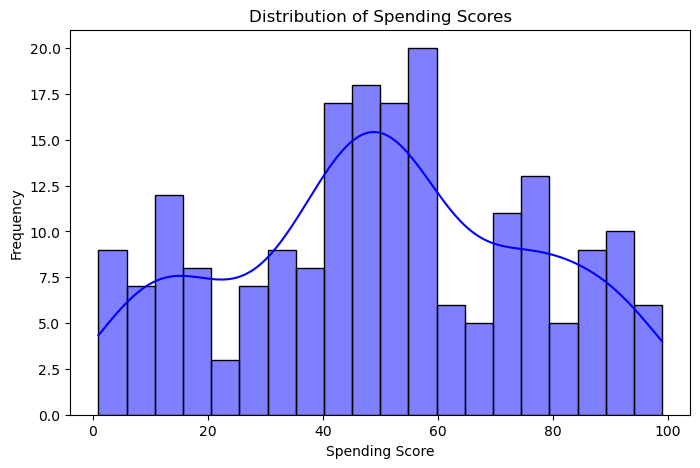

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='blue')
plt.title("Distribution of Spending Scores")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.show()

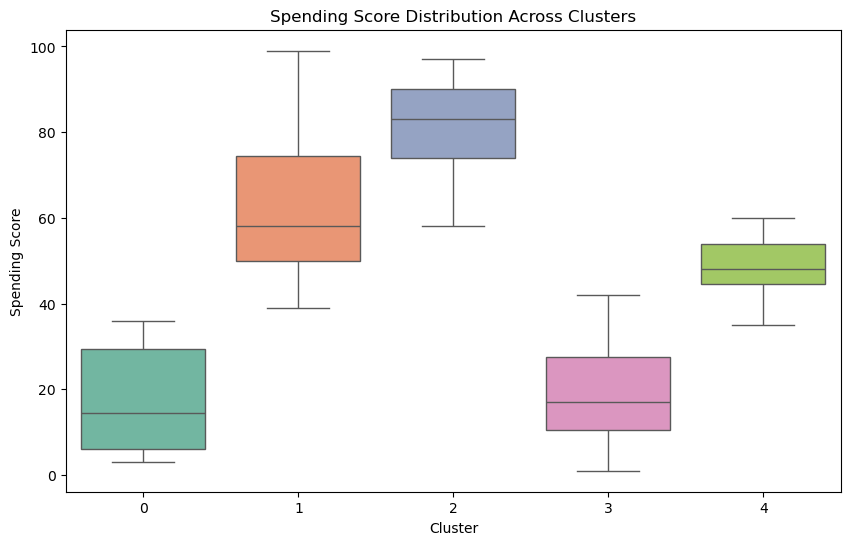

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cluster'], y=df['Spending Score (1-100)'], palette='Set2')
plt.title("Spending Score Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Spending Score")
plt.show()